In [1]:
import datetime
import socket

# Get local time
local_time = datetime.datetime.now().strftime("%Y-%m-%d %H:%M:%S")

# Get computer ID or hostname
computer_id = socket.gethostname()

# Print output with local time and computer ID
print('Assignment 1 & 2: Solutions by Nirali') # Please change your name here
print('Local Time:', local_time)
print('Computer ID:', computer_id)

Assignment 1 & 2: Solutions by Nirali
Local Time: 2023-07-28 11:33:17
Computer ID: Niralis-MacBook-Air.local


In [2]:
import pandas as pd
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sb

# ETL

<class 'pandas.core.frame.DataFrame'>
Int64Index: 85 entries, 1938 to 2022
Data columns (total 1 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Spring Wheat  85 non-null     float64
dtypes: float64(1)
memory usage: 1.3 KB


<Axes: xlabel='Year'>

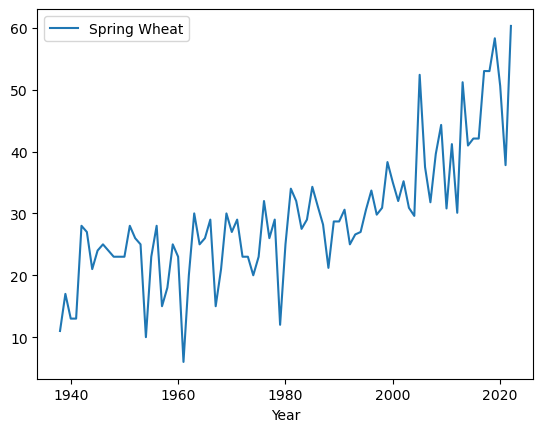

In [63]:
df_spring_wheat = pd.read_csv('/Users/niralikotak/Desktop/Agtech/rm-yields-data.csv')
df_spring_wheat = df_spring_wheat.loc[df_spring_wheat['RM'] == 244][['Year', 'Spring Wheat']]
df_spring_wheat['Year'] = pd.to_datetime(df_spring_wheat['Year'], format='%Y').dt.year
df_spring_wheat = df_spring_wheat.set_index('Year')
df_spring_wheat.head()
df_spring_wheat.info()
df_spring_wheat.plot()

# Time Series Analysis

### AR (Auto Regressive Model)

In [65]:
from statsmodels.graphics.tsaplots import plot_pacf

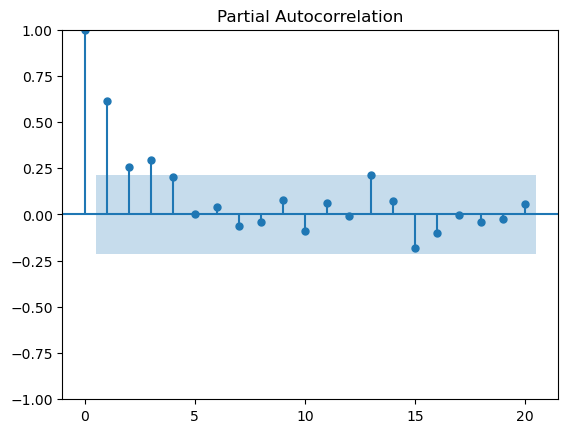

In [66]:
plot_pacf(df_spring_wheat['Spring Wheat'], lags=None, method='ywm')
plt.show()

In [67]:
import statsmodels.api as sm

# Compute autocorrelation using Durbin-Watson test
autocorrelation = sm.stats.acorr_ljungbox(df_spring_wheat['Spring Wheat'], lags=[1])

# Print the Durbin-Watson statistic and p-value
print('Durbin-Watson Statistic for lag 1: {:.2f}'.format( autocorrelation.iloc[0]['lb_stat']))
print('Durbin-Watson p-value for lag 1: {:2f}'.format(autocorrelation.iloc[0]['lb_pvalue']))

Durbin-Watson Statistic for lag 1: 32.42
Durbin-Watson p-value for lag 1: 0.000000


In [68]:
# Compute autocorrelation using Durbin-Watson test
autocorrelation = sm.stats.acorr_ljungbox(df_spring_wheat['Spring Wheat'], lags=[2])

# Print the Durbin-Watson statistic and p-value
print('Durbin-Watson Statistic for lag 2: {:.2f}'.format( autocorrelation.iloc[0]['lb_stat']))
print('Durbin-Watson p-value for lag 2: {:2f}'.format(autocorrelation.iloc[0]['lb_pvalue']))

Durbin-Watson Statistic for lag 2: 57.66
Durbin-Watson p-value for lag 2: 0.000000


In [69]:
# Compute autocorrelation using Durbin-Watson test
autocorrelation = sm.stats.acorr_ljungbox(df_spring_wheat['Spring Wheat'], lags=[3])

# Print the Durbin-Watson statistic and p-value
print('Durbin-Watson Statistic for lag 3: {:.2f}'.format( autocorrelation.iloc[0]['lb_stat']))
print('Durbin-Watson p-value for lag 3: {:2f}'.format(autocorrelation.iloc[0]['lb_pvalue']))

Durbin-Watson Statistic for lag 3: 86.95
Durbin-Watson p-value for lag 3: 0.000000


In [70]:
# Compute autocorrelation using Durbin-Watson test
autocorrelation = sm.stats.acorr_ljungbox(df_spring_wheat['Spring Wheat'], lags=[4])

# Print the Durbin-Watson statistic and p-value
print('Durbin-Watson Statistic for lag 4: {:.2f}'.format( autocorrelation.iloc[0]['lb_stat']))
print('Durbin-Watson p-value for lag 4: {:2f}'.format(autocorrelation.iloc[0]['lb_pvalue']))

Durbin-Watson Statistic for lag 4: 116.46
Durbin-Watson p-value for lag 4: 0.000000


In [71]:
from statsmodels.tsa.stattools import adfuller

# Perform Dickey-Fuller test
result = adfuller(df_spring_wheat['Spring Wheat'])

# Extract and print the test statistic and p-value
test_statistic = result[0]
p_value = result[1]
print('Dickey-Fuller Test Statistic:', test_statistic)
print('Dickey-Fuller p-value:', p_value)

Dickey-Fuller Test Statistic: 1.541589049675314
Dickey-Fuller p-value: 0.9976713140550229


In [72]:
df_spring_wheat['Spring_Wheat_diff']=df_spring_wheat['Spring Wheat'].diff()

In [73]:
df_spring_wheat = df_spring_wheat.dropna().replace([np.inf, -np.inf], np.nan).dropna()

/Users/niralikotak/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/niralikotak/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


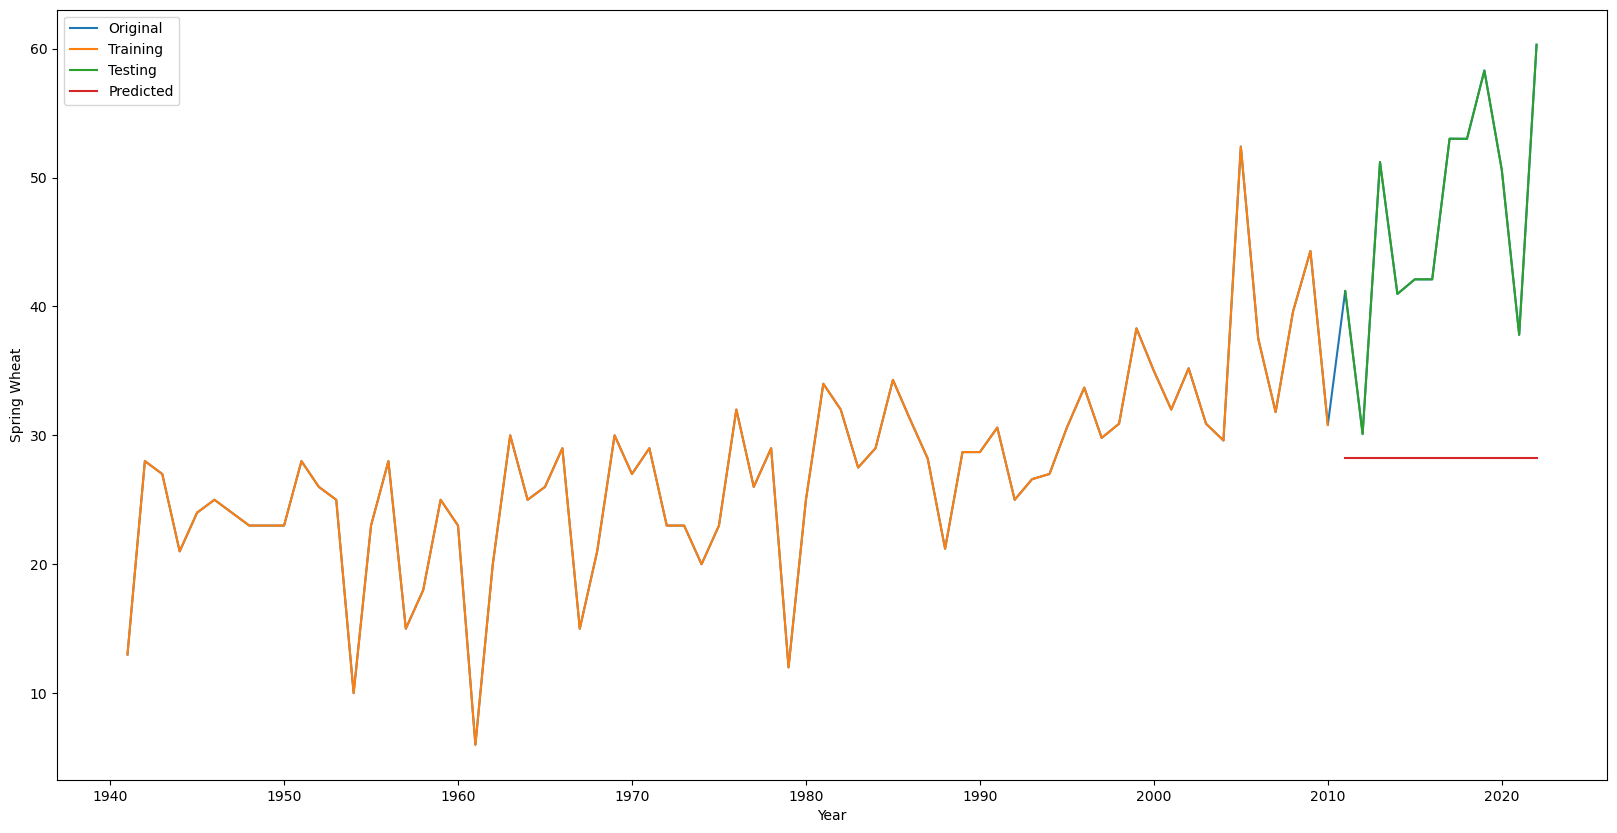

Mean Absolute Error: 18.507213853495006
Root Mean Squared Error 20.42232447203843


In [74]:
from statsmodels.tsa.ar_model import AutoReg
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

train = df_spring_wheat.loc['1938':'2010', 'Spring Wheat']
test = df_spring_wheat.loc['2011':'2022', 'Spring Wheat']
# Fit an AR model to the training set with an order of 1
ar_model = sm.tsa.AutoReg(train, lags=3).fit()

# Make predictions on the testing set
pred_ar = ar_model.predict(start=test.index[0], end=test.index[-1])


# Plot the original time series, the training set, and the testing set
fig, ax = plt.subplots(figsize=(20,10))
ax.plot(df_spring_wheat['Spring Wheat'], label='Original')
ax.plot(train, label='Training')
ax.plot(test, label='Testing')
ax.plot(pred_ar, label='Predicted')
ax.set_xlabel('Year')
ax.set_ylabel('Spring Wheat')
ax.legend()
plt.show()

# Evaluate the model's performance on the testing set
mae_ar = mean_absolute_error(test, pred_ar )
rmse_ar = mean_squared_error(test, pred_ar , squared=False)

print('Mean Absolute Error:', mae_ar)
print('Root Mean Squared Error', rmse_ar)

<Axes: >

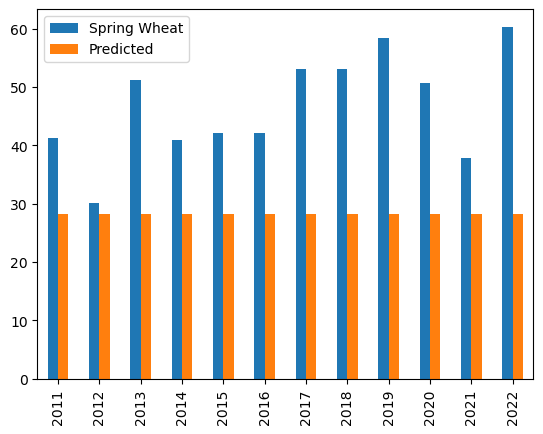

In [75]:
pd.concat([test, pred_ar], axis=1).rename(columns={0: 'Predicted'}).plot(kind='bar')

/Users/niralikotak/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/niralikotak/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/niralikotak/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/niralikotak/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/Users/niralikotak/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/

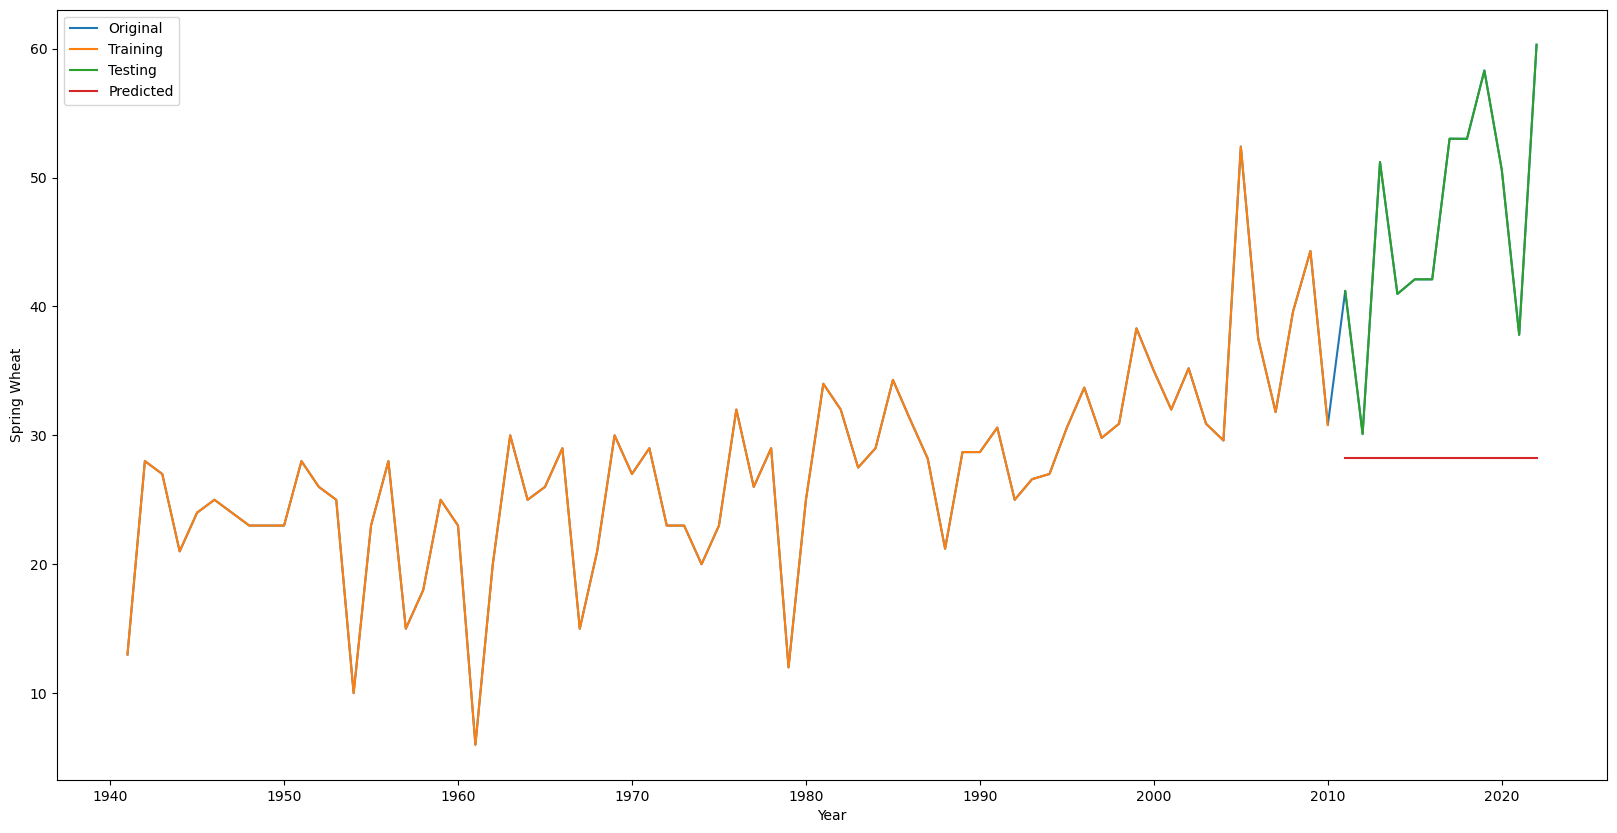

Mean Absolute Error: 18.520529103447693
Root Mean Squared Error 20.43439185524921


In [76]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

# Fit the ARIMA model
model_arima = ARIMA(train, order=(2, 0, 2))
model_fit = model_arima.fit()

# Make predictions
pred_arima = model_fit.predict(start=test.index[0], end=test.index[-1])

# Plot the original time series, the training set, and the testing set
fig, ax = plt.subplots(figsize=(20,10))
ax.plot(df_spring_wheat['Spring Wheat'], label='Original')
ax.plot(train, label='Training')
ax.plot(test, label='Testing')
ax.plot(pred_arima, label='Predicted')
ax.set_xlabel('Year')
ax.set_ylabel('Spring Wheat')
ax.legend()
plt.show()

# Evaluate the model's performance on the testing set
mae_arima = mean_absolute_error(test, pred_arima )
rmse_arima = mean_squared_error(test, pred_arima , squared=False)

print('Mean Absolute Error:', mae_arima)
print('Root Mean Squared Error', rmse_arima)

/Users/niralikotak/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/niralikotak/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


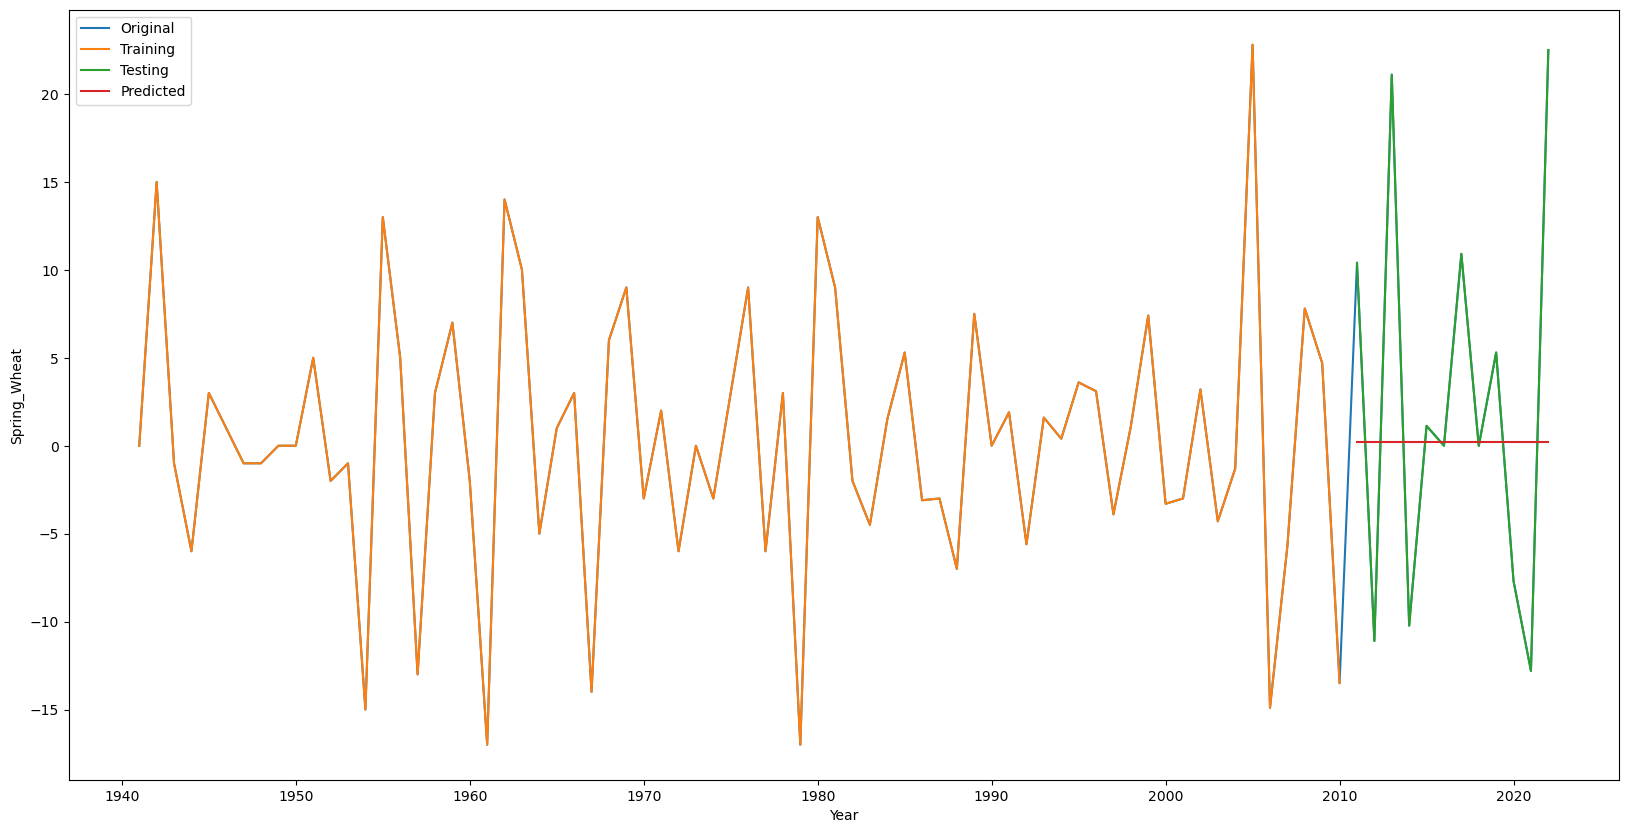

Mean Absolute Error: 9.431666666666668
Root Mean Squared Error 11.714888244332505


In [55]:
from statsmodels.tsa.ar_model import AutoReg
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

df_spring_wheat['Spring_Wheat_diff']=df_spring_wheat['Spring Wheat'].diff()

train_diff = df_spring_wheat.loc['1938':'2010', 'Spring_Wheat_diff'].dropna()
test_diff = df_spring_wheat.loc['2011':'2022', 'Spring_Wheat_diff']
# Fit an AR model to the training set with an order of 1
ar_model_diff = sm.tsa.AutoReg(train_diff, lags=3).fit()

# Make predictions on the testing set
pred_ar_diff = ar_model_diff.predict(start=test.index[0], end=test.index[-1])


# Plot the original time series, the training set, and the testing set
fig, ax = plt.subplots(figsize=(20,10))
ax.plot(df_spring_wheat['Spring_Wheat_diff'], label='Original')
ax.plot(train_diff, label='Training')
ax.plot(test_diff, label='Testing')
ax.plot(pred_ar_diff, label='Predicted')
ax.set_xlabel('Year')
ax.set_ylabel('Spring_Wheat')
ax.legend()
plt.show()

# Evaluate the model's performance on the testing set
mae_diff_ar = mean_absolute_error(test_diff, pred_ar_diff )
rmse_diff_ar = mean_squared_error(test_diff, pred_ar_diff , squared=False)

print('Mean Absolute Error:', mae_diff_ar)
print('Root Mean Squared Error', rmse_diff_ar)

### ARIMA (Autoregressive Integrated Moving Average)

/Users/niralikotak/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/niralikotak/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/niralikotak/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/niralikotak/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/Users/niralikotak/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/

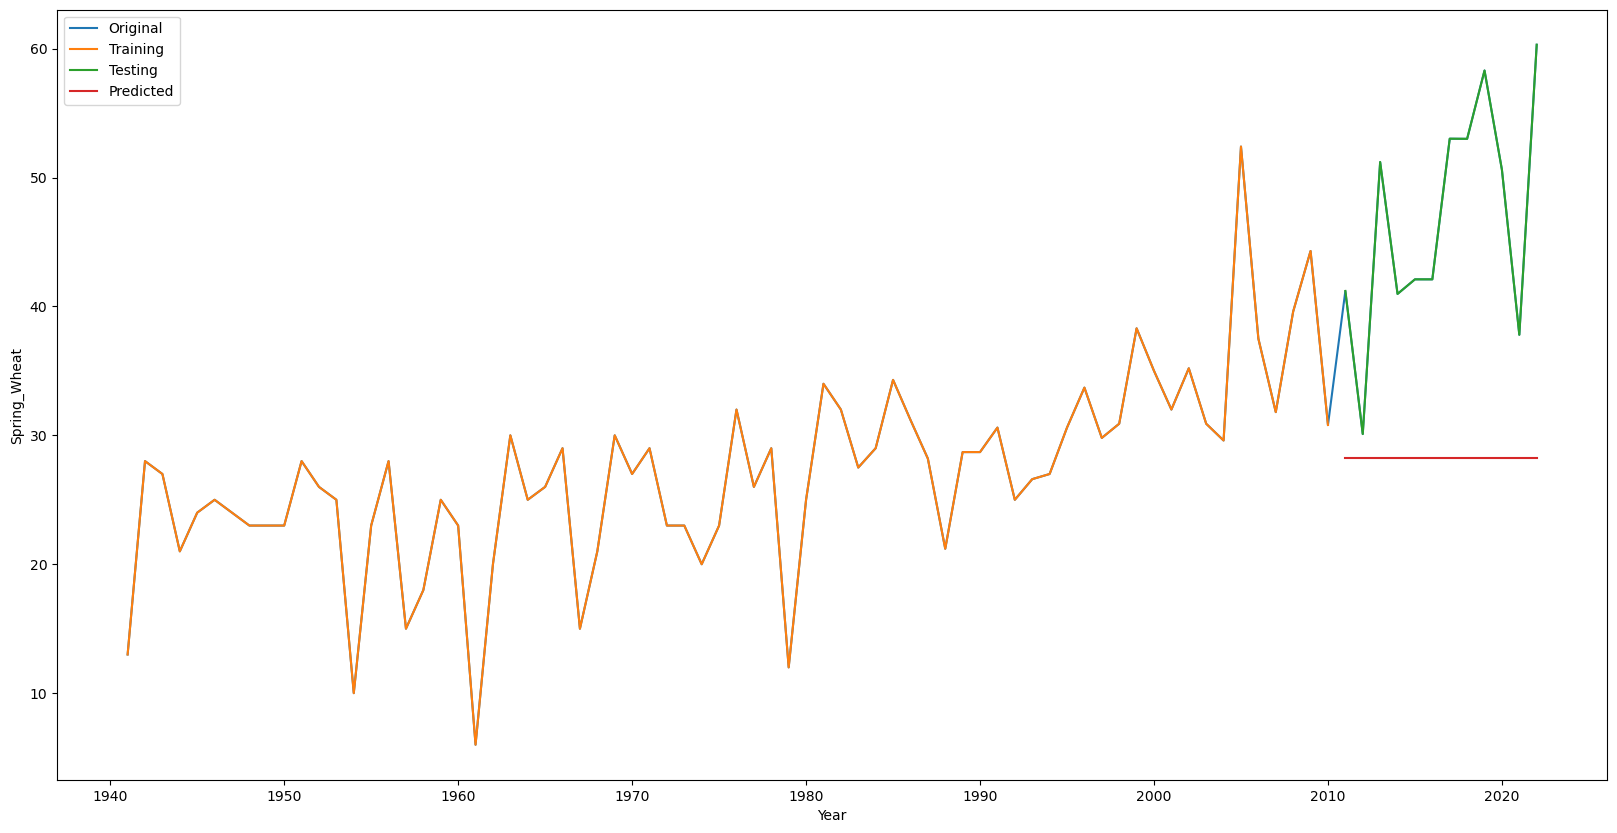

Mean Absolute Error: 18.520529103447693
Root Mean Squared Error 20.43439185524921


In [77]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

# Fit the ARIMA model
model_arima = ARIMA(train, order=(2, 0, 2))
model_fit = model_arima.fit()

# Make predictions
pred_arima = model_fit.predict(start=test.index[0], end=test.index[-1])

# Plot the original time series, the training set, and the testing set
fig, ax = plt.subplots(figsize=(20,10))
ax.plot(df_spring_wheat['Spring Wheat'], label='Original')
ax.plot(train, label='Training')
ax.plot(test, label='Testing')
ax.plot(pred_arima, label='Predicted')
ax.set_xlabel('Year')
ax.set_ylabel('Spring_Wheat')
ax.legend()
plt.show()

# Evaluate the model's performance on the testing set
mae_arima = mean_absolute_error(test, pred_arima )
rmse_arima = mean_squared_error(test, pred_arima , squared=False)

print('Mean Absolute Error:', mae_arima)
print('Root Mean Squared Error', rmse_arima)

/Users/niralikotak/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/niralikotak/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/niralikotak/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/niralikotak/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/Users/niralikotak/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/

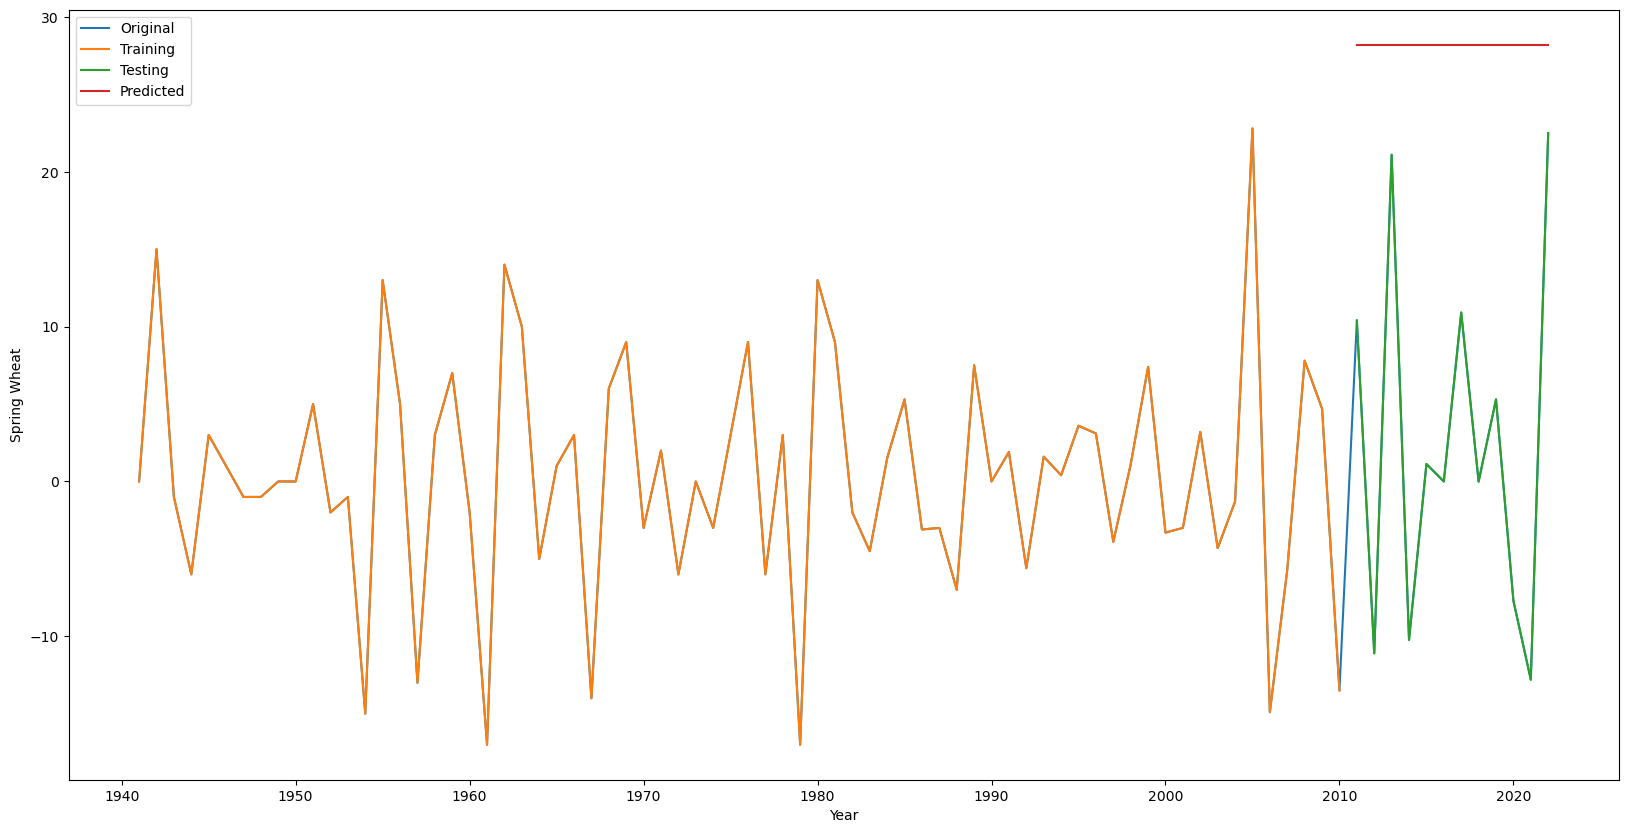

Mean Absolute Error: 18.520529103447693
Root Mean Squared Error 20.43439185524921


In [78]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

# Fit the ARIMA model
model_arima_diff = ARIMA(train_diff, order=(3, 0, 1))
model_fit_diff = model_arima.fit()

# Make predictions
pred_arima_diff = model_fit.predict(start=test_diff.index[0], end=test_diff.index[-1])

# Plot the original time series, the training set, and the testing set
fig, ax = plt.subplots(figsize=(20,10))
ax.plot(df_spring_wheat['Spring_Wheat_diff'], label='Original')
ax.plot(train_diff, label='Training')
ax.plot(test_diff, label='Testing')
ax.plot(pred_arima, label='Predicted')
ax.set_xlabel('Year')
ax.set_ylabel('Spring Wheat')
ax.legend()
plt.show()

# Evaluate the model's performance on the testing set
mae_arima_diff = mean_absolute_error(test, pred_arima_diff )
rmse_arima_diff = mean_squared_error(test, pred_arima_diff , squared=False)

print('Mean Absolute Error:', mae_arima_diff)
print('Root Mean Squared Error', rmse_arima_diff)

## XGBoost Time Series

In [82]:
import xgboost as xgb
from sklearn.metrics import mean_absolute_error, mean_squared_error
from math import sqrt

# Step 1: Prepare the data
# Create lagged features of the target variable
df_spring_wheat['lag1'] = df_spring_wheat['Spring Wheat'].shift(1)
df_spring_wheat['lag2'] = df_spring_wheat['Spring Wheat'].shift(2)
df_spring_wheat.dropna(inplace=True)

df_spring_wheat.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 74 entries, 1949 to 2022
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Spring Wheat       74 non-null     float64
 1   lag1               74 non-null     float64
 2   lag2               74 non-null     float64
 3   Spring_Wheat_diff  74 non-null     float64
dtypes: float64(4)
memory usage: 2.9 KB


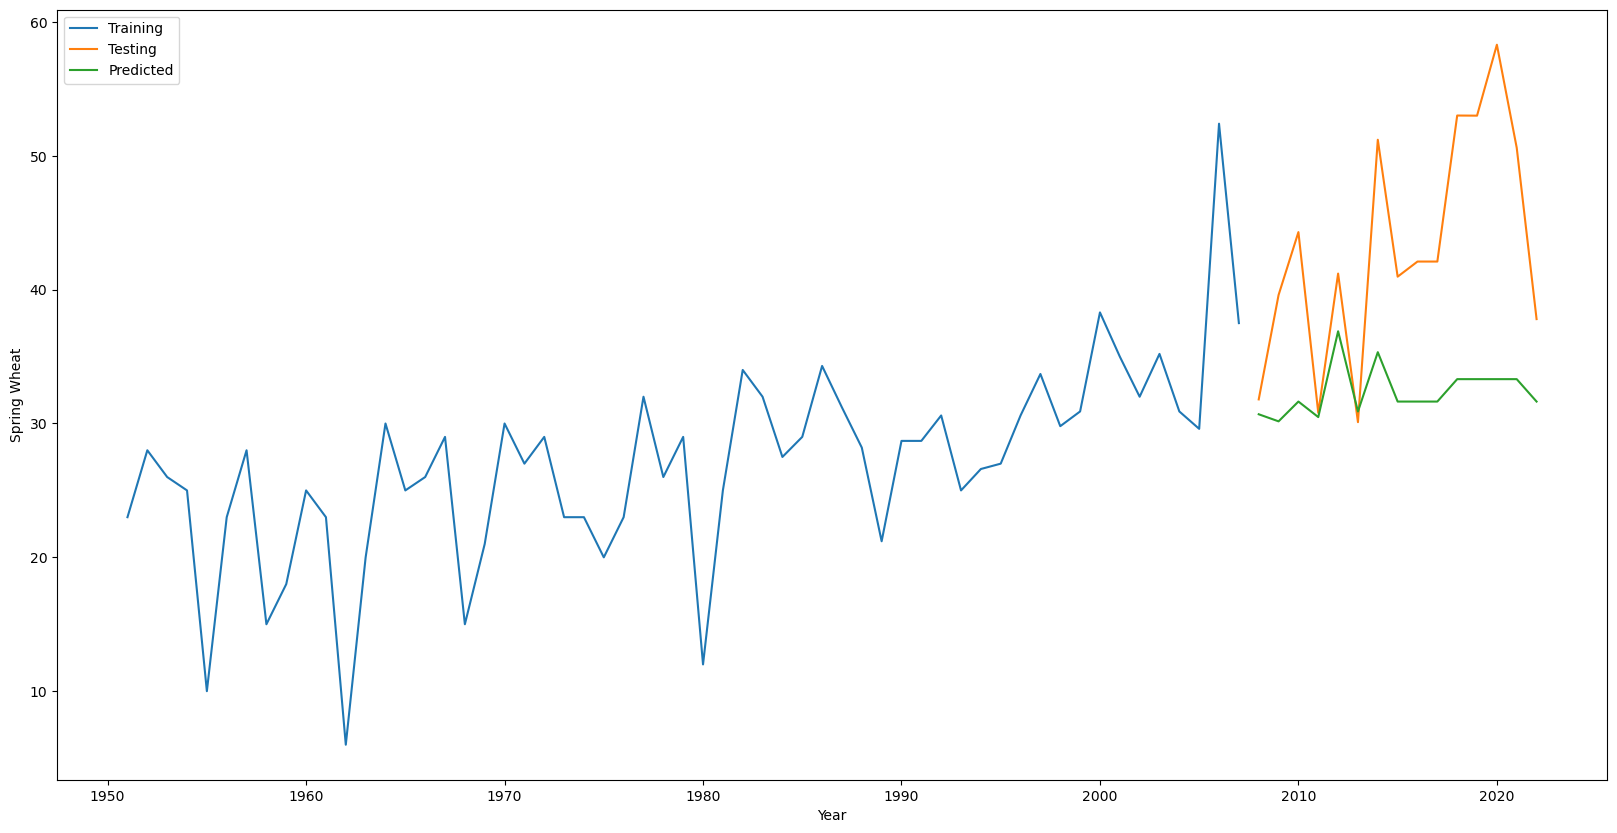

MAE: 13.649521896362304
RMSE: 15.73299541620606


In [83]:
import xgboost as xgb
from sklearn.metrics import mean_absolute_error, mean_squared_error
from math import sqrt

# Step 1: Prepare the data
# Create lagged features of the target variable
df_spring_wheat['lag1'] = df_spring_wheat['Spring Wheat'].shift(1)
df_spring_wheat['lag2'] = df_spring_wheat['Spring Wheat'].shift(2)
df_spring_wheat.dropna(inplace=True)

# Step 2: Split the data
train_size = int(len(df_spring_wheat) * 0.8)  # 80% for training
train_data = df_spring_wheat.iloc[:train_size]
test_data = df_spring_wheat.iloc[train_size:]

# Separate features and target variables
train_features = train_data[['lag1', 'lag2']]
train_target = train_data['Spring Wheat']
test_features = test_data[['lag1', 'lag2']]
test_target = test_data['Spring Wheat']

# Step 3: Define the XGBoost model
model_xgb = xgb.XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=3) # grid search

# Step 4: Train the model
model_xgb.fit(train_features, train_target)

# Step 5: Make predictions
pred_xgb = model_xgb.predict(test_features)
pred_xgb = pd.Series(pred_xgb, index=test_features.index)

# Step 6: Evaluate the model
mae_xgb = mean_absolute_error(test_target, pred_xgb)
rmse_xgb = sqrt(mean_squared_error(test_target, pred_xgb))

# Plot the original time series, the training set, and the testing set
fig, ax = plt.subplots(figsize=(20,10))
ax.plot(train_features['lag1'], label='Training')
ax.plot(test_features['lag1'], label='Testing')
ax.plot(pred_xgb, label='Predicted')
ax.set_xlabel('Year')
ax.set_ylabel('Spring Wheat')
ax.legend()
plt.show()
print("MAE:", mae_xgb)
print("RMSE:", rmse_xgb)

In [60]:
pip install xgboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 5.7 MB/s eta 0:00:00m eta 0:00:010:00:01
Note: you may need to restart the kernel to use updated packages.


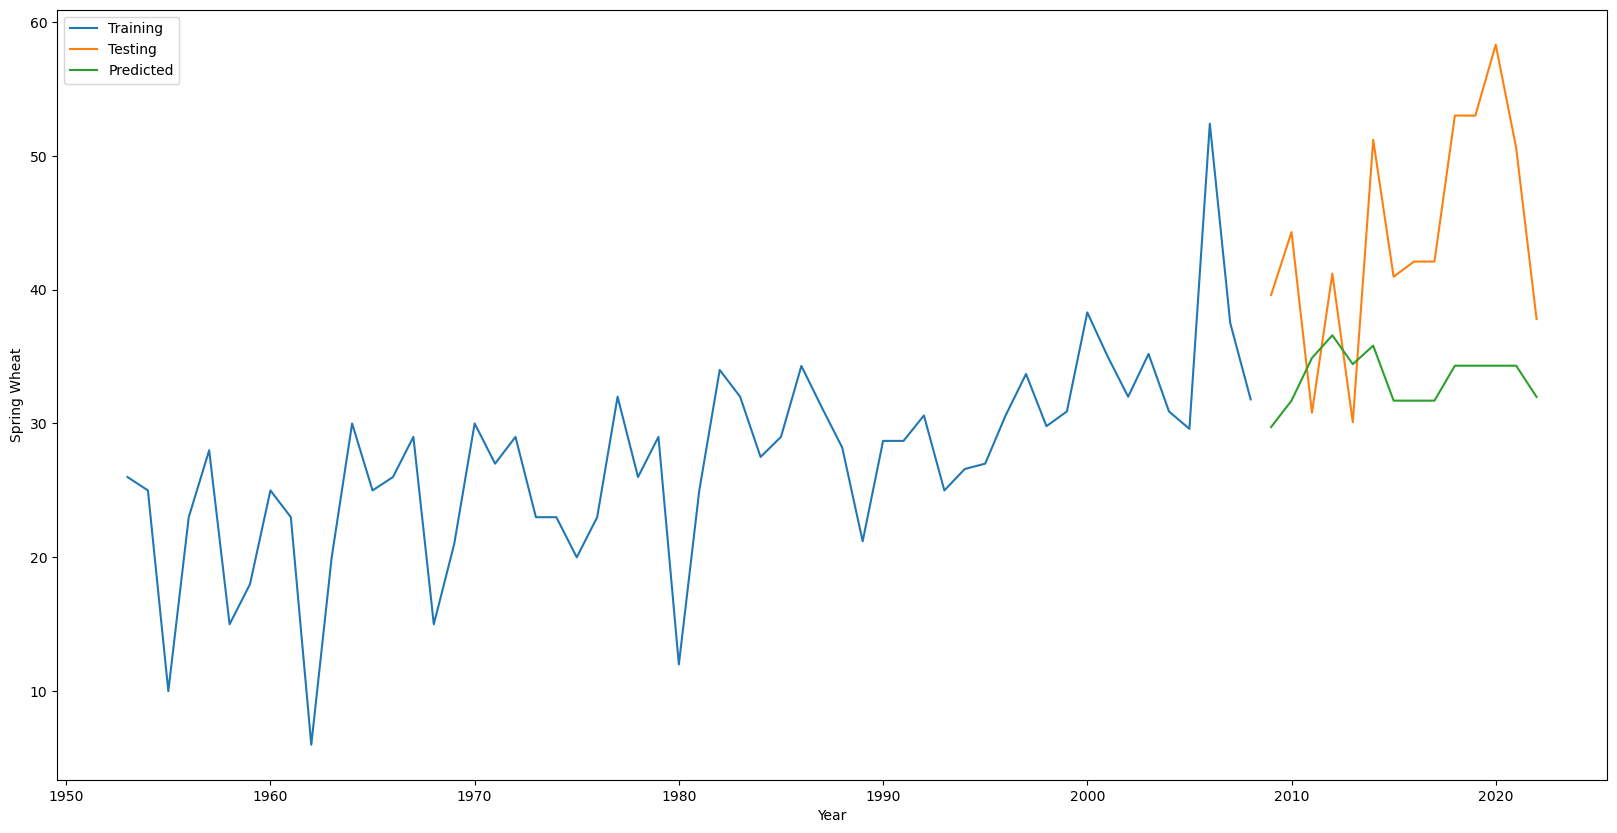

MAE: 13.07349221910749
RMSE: 15.296497350491514


In [84]:
#With n_estimators = 50
import xgboost as xgb
from sklearn.metrics import mean_absolute_error, mean_squared_error
from math import sqrt

# Step 1: Prepare the data
# Create lagged features of the target variable
df_spring_wheat['lag1'] = df_spring_wheat['Spring Wheat'].shift(1)
df_spring_wheat['lag2'] = df_spring_wheat['Spring Wheat'].shift(2)
df_spring_wheat.dropna(inplace=True)

# Step 2: Split the data
train_size = int(len(df_spring_wheat) * 0.8)  # 80% for training
train_data = df_spring_wheat.iloc[:train_size]
test_data = df_spring_wheat.iloc[train_size:]

# Separate features and target variables
train_features = train_data[['lag1', 'lag2']]
train_target = train_data['Spring Wheat']
test_features = test_data[['lag1', 'lag2']]
test_target = test_data['Spring Wheat']

# Step 3: Define the XGBoost model
model_xgb = xgb.XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=3) # grid search

# Step 4: Train the model
model_xgb.fit(train_features, train_target)

# Step 5: Make predictions
pred_xgb = model_xgb.predict(test_features)
pred_xgb = pd.Series(pred_xgb, index=test_features.index)

# Step 6: Evaluate the model
mae_xgb = mean_absolute_error(test_target, pred_xgb)
rmse_xgb = sqrt(mean_squared_error(test_target, pred_xgb))

# Plot the original time series, the training set, and the testing set
fig, ax = plt.subplots(figsize=(20,10))
ax.plot(train_features['lag1'], label='Training')
ax.plot(test_features['lag1'], label='Testing')
ax.plot(pred_xgb, label='Predicted')
ax.set_xlabel('Year')
ax.set_ylabel('Spring Wheat')
ax.legend()
plt.show()
print("MAE:", mae_xgb)
print("RMSE:", rmse_xgb)